In [14]:
import numpy as np
import pandas as pd
import re
df =pd.read_csv('/kaggle/input/multimodal-sentiment-data/dataset.csv')

In [15]:
df.head()

,Image,Text,Sentiment
0,[[[-0.5507521 -0.6045698 -0.6229138 ]\n [-0...,I am feeling positive today because I see Tibe...,POSITIVE
1,[[[-0.5480964 -0.5235891 -0.76556504]\n [-0...,I am feeling negative today because I see cric...,NEGATIVE
2,[[[0.16979091 0.29803866 0.3613662 ]\n [0.199...,I am feeling positive today because I see Cock...,POSITIVE
3,[[[-0.24860182 -0.35181937 -0.4667918 ]\n [-0...,I am feeling negative today because I see Grif...,POSITIVE
4,[[[ 0.20944206 0.12295917 0.06715906]\n [ 0...,I am feeling positive today because I see logg...,POSITIVE


In [16]:
image_data = df['Image'].iloc[10]

In [17]:
image_data

'[[[-0.25281996 -0.4069645  -0.58333594]\n  [-0.28343686 -0.4464572  -0.6334771 ]\n  [-0.3507761  -0.48398235 -0.65437835]\n  ...\n  [ 0.21078125  0.20298907  0.17619857]\n  [ 0.32385862  0.296816    0.23759687]\n  [ 0.23925637  0.18537837  0.15006244]]\n\n [[-0.2626741  -0.42300054 -0.5732472 ]\n  [-0.28583533 -0.40029013 -0.5316256 ]\n  [-0.34947953 -0.44240016 -0.5601913 ]\n  ...\n  [ 0.18932001  0.18171974  0.1312237 ]\n  [ 0.34992167  0.3491739   0.2905792 ]\n  [ 0.3643735   0.36423895  0.34429777]]\n\n [[-0.28087804 -0.41903728 -0.5998374 ]\n  [-0.24527648 -0.3495219  -0.5010213 ]\n  [-0.27841538 -0.3927372  -0.51874626]\n  ...\n  [ 0.18756802  0.2039826   0.18321751]\n  [ 0.34752354  0.3674429   0.3408687 ]\n  [ 0.34780684  0.35165632  0.35601187]]\n\n ...\n\n [[ 0.24823518  0.15141858  0.02355508]\n  [ 0.252232    0.19342658  0.06671838]\n  [ 0.2623441   0.19491588  0.07227157]\n  ...\n  [ 0.29577625  0.27529308  0.18007873]\n  [ 0.27469677  0.26297387  0.16839539]\n  [ 0.29509

Number of elements in flat_list: 108
[[[0.37359002 0.29651775 0.20833203]
  [0.35828157 0.2767714  0.18326145]
  [0.32461195 0.25800882 0.17281083]
  [0.60539062 0.60149454 0.58809928]
  [0.66192931 0.648408   0.61879843]
  [0.61962819 0.59268919 0.57503122]]

 [[0.36866295 0.28849973 0.2133764 ]
  [0.35708233 0.29985493 0.2341872 ]
  [0.32526024 0.27879992 0.21990435]
  [0.59466001 0.59085987 0.56561185]
  [0.67496084 0.67458695 0.6452896 ]
  [0.68218675 0.68211948 0.67214889]]

 [[0.35956098 0.29048136 0.2000813 ]
  [0.37736176 0.32523905 0.24948935]
  [0.36079231 0.3036314  0.24062687]
  [0.59378401 0.6019913  0.59160875]
  [0.67376177 0.68372145 0.67043435]
  [0.67390342 0.67582816 0.67800594]]

 [[0.62411759 0.57570929 0.51177754]
  [0.626116   0.59671329 0.53335919]
  [0.63117205 0.59745794 0.53613579]
  [0.64788813 0.63764654 0.59003936]
  [0.63734839 0.63148693 0.58419769]
  [0.64754946 0.62898329 0.58560834]]

 [[0.62547691 0.58552492 0.51905732]
  [0.62883149 0.60292324 0.529

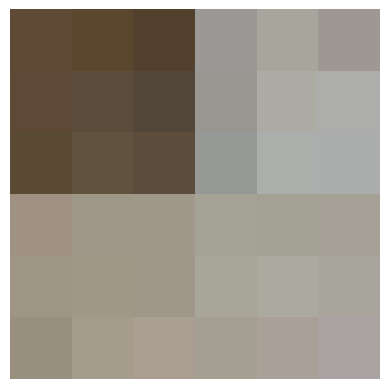

In [35]:
import numpy as np
import re
import matplotlib.pyplot as plt

# Clean the string to make it valid for conversion
cleaned_data = image_data.replace('\n', '')  # Remove newlines
cleaned_data = cleaned_data.replace('...', '')  # Remove ellipses
cleaned_data = re.sub(r'(\[\[|\]|\[|\])', '', cleaned_data)  # Remove outer brackets
cleaned_data = cleaned_data.replace(' ', ',')  # Replace spaces with commas
cleaned_data = re.sub(r',+', ',', cleaned_data)  # Remove duplicate commas

# Now reformat the cleaned_data into a valid 3D array representation
# First, convert it to a list of floats
flat_list = list(map(float, cleaned_data.split(',')))

# Print the size of the flat_list for debugging
print(f"Number of elements in flat_list: {len(flat_list)}")

# Determine the shape based on the number of elements
# Assuming images are RGB and checking if the length is divisible by 3
num_elements = len(flat_list)
if num_elements % 3 != 0:
    print("The number of elements is not divisible by 3. Cannot reshape to (H, W, 3).")
else:
    height_width = num_elements // 3
    # Try to infer the dimensions (this is just an example, change as needed)
    # For instance, assuming a square image
    side_length = int(np.sqrt(height_width))  # This will give a side length for square shape
    if side_length * side_length * 3 == num_elements:
        # Reshape to (side_length, side_length, 3)
        image_array = np.array(flat_list).reshape(side_length, side_length, 3)

        # Rescale pixel values from [-1, 1] to [0, 1]
        image_array = (image_array + 1) / 2

        print(image_array)
        # Display the image
        plt.imshow(image_array)
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print("Cannot determine dimensions for reshaping.")

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/kaggle/input/multimodal-sentiment-data/dataset.csv')

# Split into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print(f"Training samples: {len(train_data)}, Test samples: {len(test_data)}")


Training samples: 1142, Test samples: 286


In [20]:
from transformers import CLIPProcessor, CLIPModel, BertTokenizer, BertModel
import torch

# Load CLIP model for image embeddings
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load BERT model for text embeddings
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
from PIL import Image

def get_image_embedding(image_array):
    from torchvision.transforms import ToTensor

    # Convert the array to a tensor
    image = ToTensor()(image_array).unsqueeze(0)  # Add batch dimension

    inputs = clip_processor(images=image, return_tensors="pt")
    with torch.no_grad():
        image_features = clip_model.get_image_features(**inputs)

    return image_features


def get_text_embedding(text):
    inputs = bert_tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        text_features = bert_model(**inputs).last_hidden_state[:, 0, :]  # CLS token
    return text_features


In [22]:
from torch.utils.data import Dataset, DataLoader

class MultimodalDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image_data = row['Image']
        # Clean the string to make it valid for conversion
        cleaned_data = image_data.replace('\n', '')  # Remove newlines
        cleaned_data = cleaned_data.replace('...', '')  # Remove ellipses
        cleaned_data = re.sub(r'(\[\[|\]|\[|\])', '', cleaned_data)  # Remove outer brackets
        cleaned_data = cleaned_data.replace(' ', ',')  # Replace spaces with commas
        cleaned_data = re.sub(r',+', ',', cleaned_data)  # Remove duplicate commas

        # Now reformat the cleaned_data into a valid 3D array representation
        # First, convert it to a list of floats
        flat_list = list(map(float, filter(None, cleaned_data.split(','))))

        # Print the size of the flat_list for debugging
#         print(f"Number of elements in flat_list: {len(flat_list)}")

        # Determine the shape based on the number of elements
        # Assuming images are RGB and checking if the length is divisible by 3
        num_elements = len(flat_list)
        if num_elements % 3 != 0:
            print("The number of elements is not divisible by 3. Cannot reshape to (H, W, 3).")
        else:
            height_width = num_elements // 3
            # Try to infer the dimensions (this is just an example, change as needed)
            # For instance, assuming a square image
            side_length = int(np.sqrt(height_width))  # This will give a side length for square shape
            if side_length * side_length * 3 == num_elements:
                # Reshape to (side_length, side_length, 3)
                image_array = np.array(flat_list).reshape(side_length, side_length, 3)
                # Rescale pixel values from [-1, 1] to [0, 1] (if needed)
                image_array = (image_array + 1) / 2
        image_emb = get_image_embedding(image_array).squeeze(0)
        text_emb = get_text_embedding(row['Text']).squeeze(0)
        label = 1 if row['Sentiment'] == 'POSITIVE' else 0  # Convert to binary
        return torch.cat((image_emb, text_emb)), label


In [23]:
# Create DataLoaders
train_dataset = MultimodalDataset(train_data)
test_dataset = MultimodalDataset(test_data)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class MultimodalSentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultimodalSentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)


In [25]:
# Initialize model, loss function, and optimizer
model = MultimodalSentimentClassifier(input_dim=1280, hidden_dim=512, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
import time
start_time = time.time()
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for b,(embeddings, labels) in enumerate(train_loader):
        b+=1
        y_pred = model(embeddings)
        loss = criterion(y_pred, labels)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == labels).sum()
        trn_corr += batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f'Epoch {i} Loss {loss.item()}')
    train_losses.append(loss.item())
    train_correct.append(trn_corr)
    with torch.no_grad():
        for b,(embeddings, labels) in enumerate(test_loader):
            y_val = model(embeddings)
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == labels).sum()
    loss = criterion(y_val,labels)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)
total_time = time.time() - start_time
print(f'Total Time: {total_time/60} minutes')

Epoch 0 Loss 0.6822776794433594
Epoch 0 Loss 1.0903462171554565
Epoch 0 Loss 0.6510791778564453
Epoch 0 Loss 0.6191955208778381
Epoch 0 Loss 0.6751877069473267
Epoch 0 Loss 0.6278193593025208
Epoch 0 Loss 0.6190910339355469
Epoch 0 Loss 0.6393348574638367
Epoch 0 Loss 0.6728171110153198
Epoch 0 Loss 0.6302216649055481
Epoch 0 Loss 0.56341153383255
Epoch 0 Loss 0.5770089030265808
Epoch 0 Loss 0.5972148180007935
Epoch 0 Loss 0.5701267123222351
Epoch 0 Loss 0.5601924657821655
Epoch 0 Loss 0.5844811201095581
Epoch 0 Loss 0.5667216181755066
Epoch 0 Loss 0.4575747549533844
Epoch 0 Loss 0.42940378189086914
Epoch 0 Loss 0.5208788514137268
Epoch 0 Loss 0.44420766830444336
Epoch 0 Loss 0.5160137414932251
Epoch 0 Loss 0.44208502769470215
Epoch 0 Loss 0.4470859467983246
Epoch 0 Loss 0.5460641384124756
Epoch 0 Loss 0.47259408235549927
Epoch 0 Loss 0.5786496996879578
Epoch 0 Loss 0.3744833767414093
Epoch 0 Loss 0.47620663046836853
Epoch 0 Loss 0.49065539240837097
Epoch 0 Loss 0.7054341435432434
Epoc

In [28]:
import matplotlib.pyplot as plt

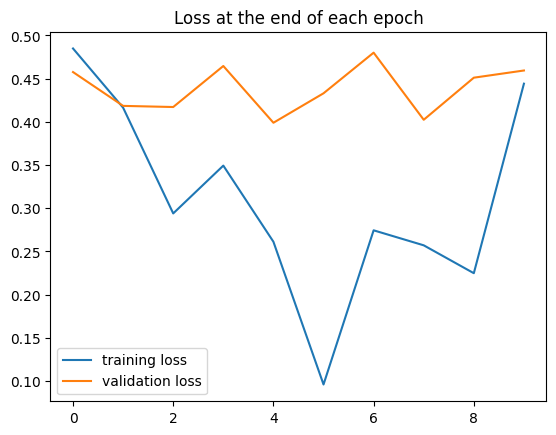

In [29]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

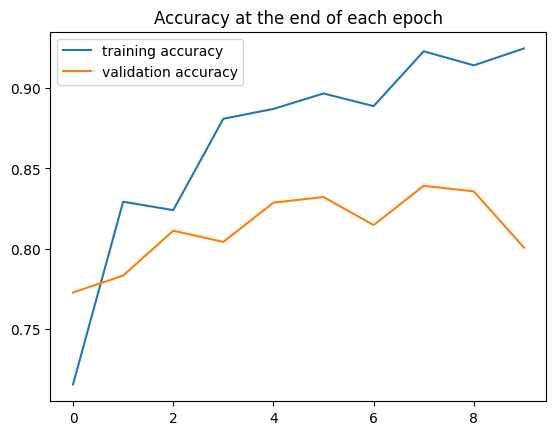

In [30]:
plt.plot([t/1142 for t in train_correct], label='training accuracy')
plt.plot([t/286 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [32]:
torch.save(model.state_dict(),'Multimodel_Sentiment_Analysis_Model.pt')

In [40]:
model2 = MultimodalSentimentClassifier(input_dim=1280, hidden_dim=512, output_dim=2)

In [42]:
model2.load_state_dict(torch.load('/kaggle/working/Multimodel_Sentiment_Analysis_Model.pt',weights_only=True));
model2.eval()

MultimodalSentimentClassifier(
  (fc1): Linear(in_features=1280, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [43]:
import random
with torch.no_grad():
    # Pick a random batch and sample within the test loader
    random_batch = random.choice(list(test_loader))
    embeddings, labels = random_batch  # Get the batch

    # Randomly select a single record from the batch
    idx = random.randint(0, len(embeddings) - 1)
    single_embedding = embeddings[idx].unsqueeze(0)  # Add batch dimension
    true_label = labels[idx].item()

    # Make a prediction
    y_val = model2(single_embedding)
    predicted_label = torch.max(y_val.data, 1)[1].item()  # Get predicted value

    # Print the result
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")


True Label: 1, Predicted Label: 1
